# Section 2.3 — Inventory of discrete distributions

This notebook contains all the code examples from [Section 2.3 Inventory of discrete distributions]() of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

# # silence annoying warnings
# import warnings; warnings.filterwarnings('ignore')

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
from plot_helpers import generate_pmf_panel
from scipy.stats.distributions import binom


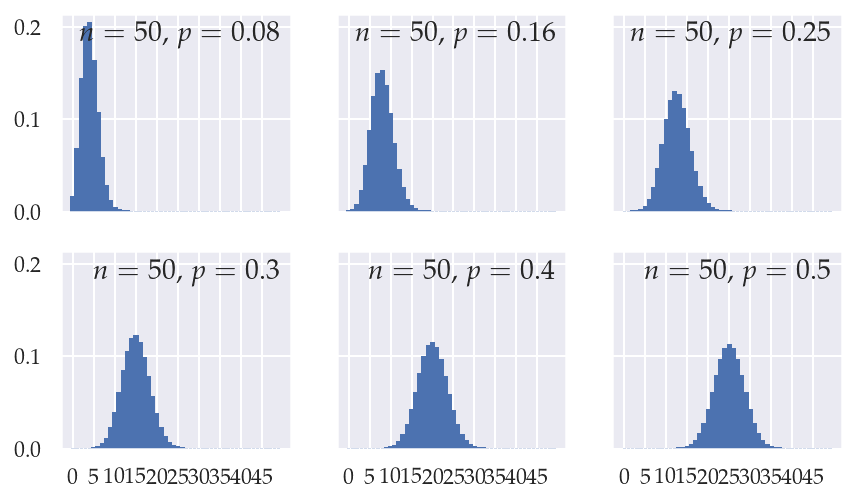

In [5]:
model = binom
kmax = 50
k = np.arange(0, kmax)
kticks = 5


# parameter dicts (list of lists)
params_matrix = [
    [ dict(n=kmax, p=0.08),  dict(n=kmax, p=0.16),  dict(n=kmax, p=0.25) ],
    [ dict(n=kmax, p=0.3),   dict(n=kmax, p=0.4),   dict(n=kmax, p=0.5)  ],
]

params_to_latex = {
    'mu': '\\lambda'
}

generate_pmf_panel('figures/prob/probpanels/binomial_panel.pdf',
                   k, model, params_matrix,
                   params_to_latex=params_to_latex,
                   kticks=kticks,
                   fontsize=14)


## Poisson


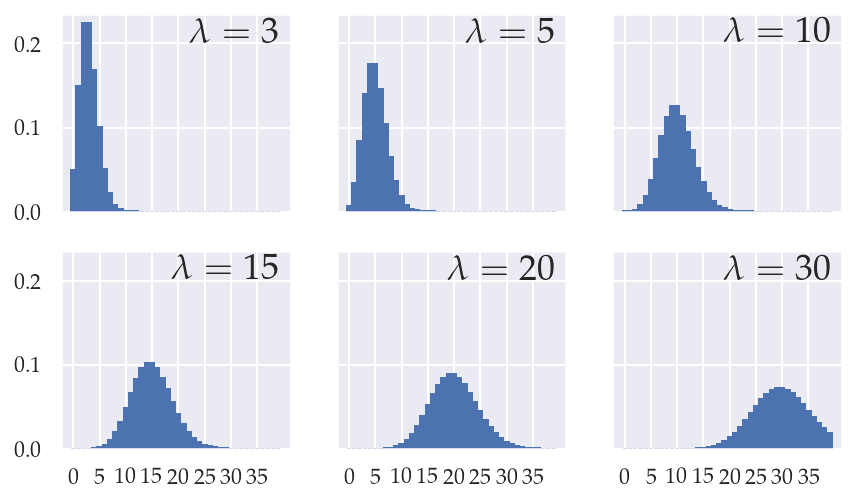

In [6]:
from scipy.stats.distributions import poisson

model = poisson
kmax = 40
k = np.arange(0, kmax)
kticks = 5


# parameter dicts (list of lists)
params_matrix = [
    [dict(mu=3),  dict(mu=5),  dict(mu=10)],
    [dict(mu=15), dict(mu=20), dict(mu=30)]
]

params_to_latex = {
    'mu': '\\lambda'
}

generate_pmf_panel('figures/prob/probpanels/poisson_panel.pdf',
                   k, model, params_matrix,
                   params_to_latex=params_to_latex,
                   kticks=kticks)
